In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os

# score per step

In [82]:
table_2_df = pd.read_csv('../if_agents/jericho-metadata/table_2_df.csv')

def score_per_step(json_paths, labels, game_name):
    data_lsts = [json.load(open(json_path, 'r')) for json_path in json_paths]
    dfs = [pd.DataFrame(data) for data in data_lsts]
    # Create a new figure
    plt.figure()
    
    for lab, df in zip(labels, dfs):
        plt.plot(df.index, df['score'], label=lab)
        
    try:
        max_score = int(table_2_df[table_2_df['game'] == game_name]['max_score'])
    except:
        max_score = 'unknown'
    if not max_score == 'unknown':
        plt.axhline(y=max_score, color='r', linestyle=':')

    # Set the title and labels
    plt.title(f"Score per step for game '{game_name}'")
    plt.xlabel('Step')
    plt.ylabel('Score')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

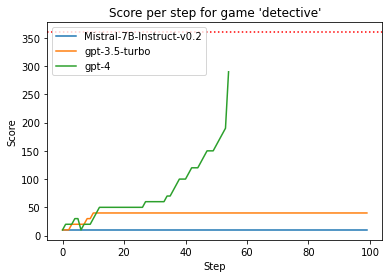

In [48]:
score_per_step(
    [
        '/Users/mirandamelodies99/code/if-agents/experiments/mistral-detective_1709364418.261414/detective.z5.json',
        '/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_1709247169.470474/detective.z5.json',
        '/Users/mirandamelodies99/code/if-agents/experiments/autoreg_dspy_detective_100_predict_gpt4_1709254662.752867/detective.z5.json'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    'detective',
)

In [54]:
# accidentally ran all models on all the possible games oooooops
mistral_dir='/Users/mirandamelodies99/code/if-agents/experiments/mistral-possible_1709364418.261414'
gpt_35_dir ='/Users/mirandamelodies99/code/if-agents/experiments/gpt3.5-possible_1709367182.070883'
gpt_4_dir='/Users/mirandamelodies99/code/if-agents/experiments/gpt4-possible_1709367186.813441'

all_game_files = [filename for filename in os.listdir(mistral_dir) if filename.endswith('.json')]
game_names = [filename.split('.')[0] for filename in all_game_files]

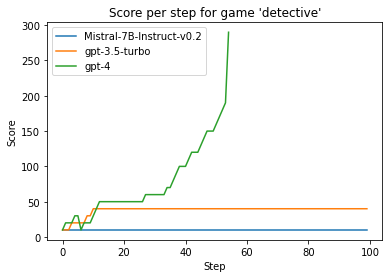

In [80]:
game_file = 'detective.z5.json'

score_per_step(
    [
        f'{mistral_dir}/{game_file}',
        f'{gpt_35_dir}/{game_file}',
        f'{gpt_4_dir}/{game_file}'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    'detective'
    )

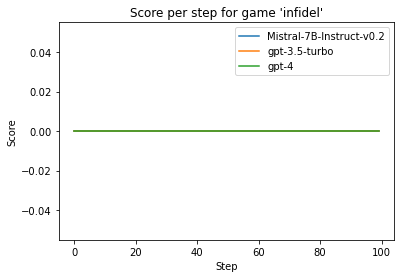

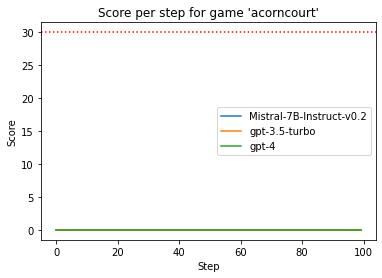

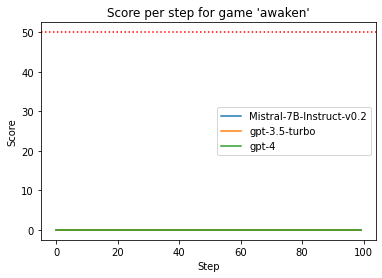

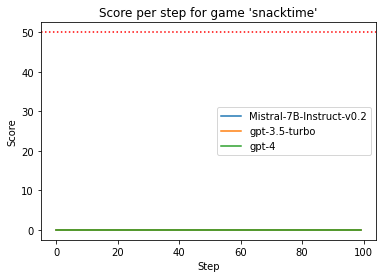

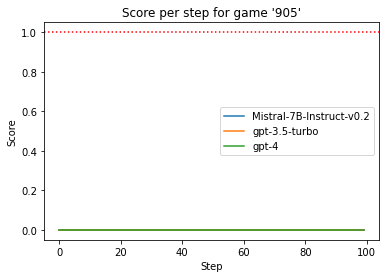

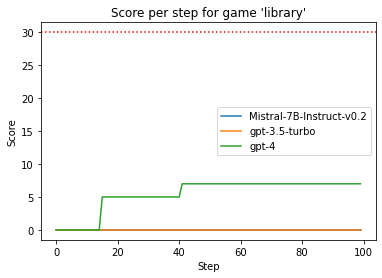

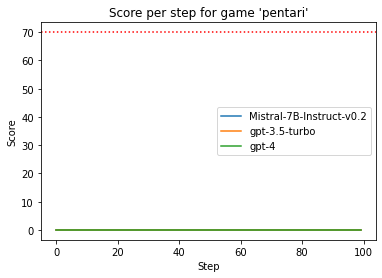

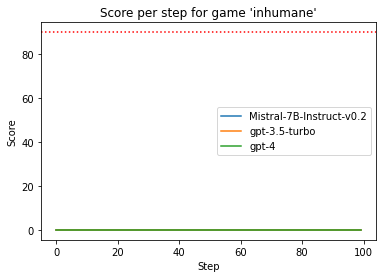

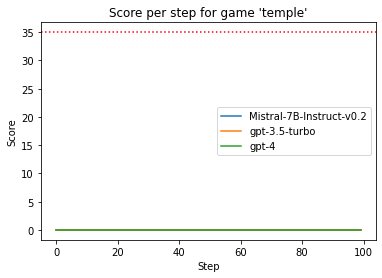

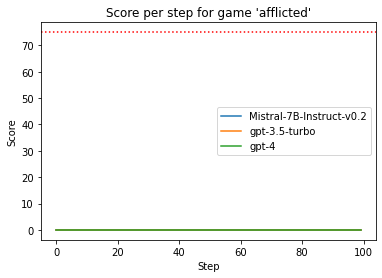

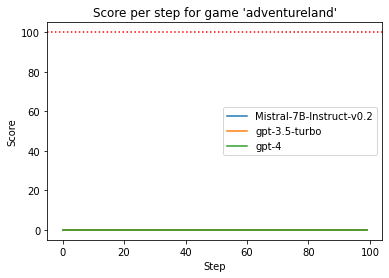

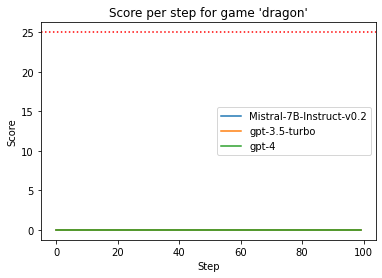

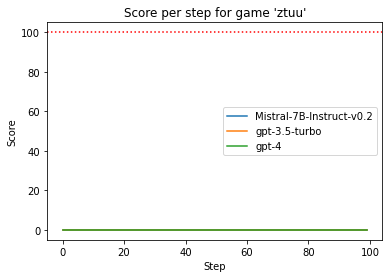

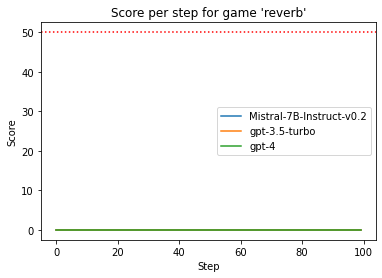

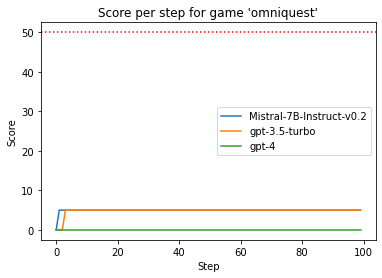

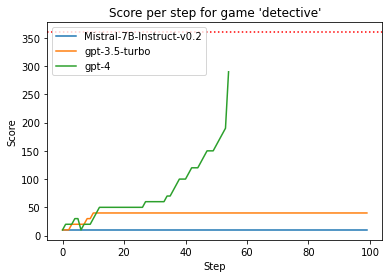

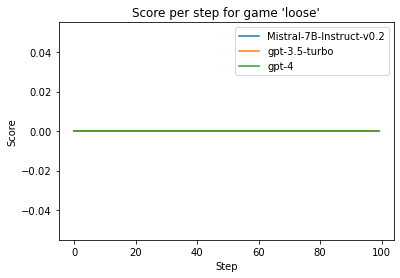

In [85]:
for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    score_per_step(
    [
        f'{mistral_dir}/{game_file}',
        f'{gpt_35_dir}/{game_file}',
        f'{gpt_4_dir}/{game_file}'
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo', 'gpt-4'],
    game
    )

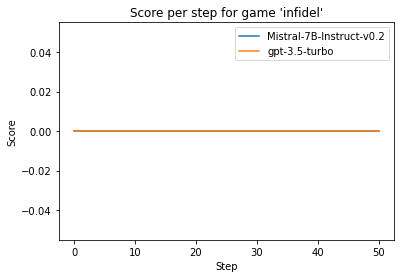

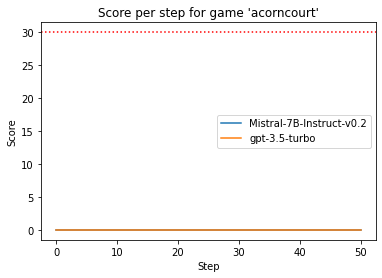

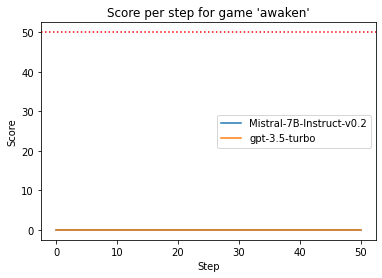

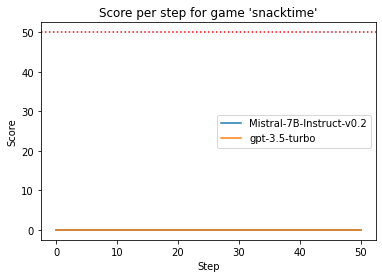

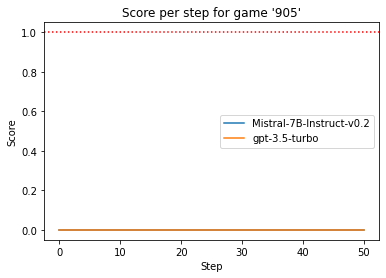

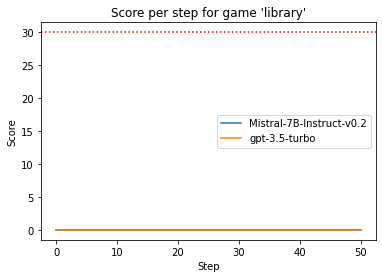

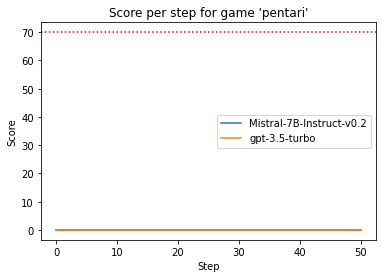

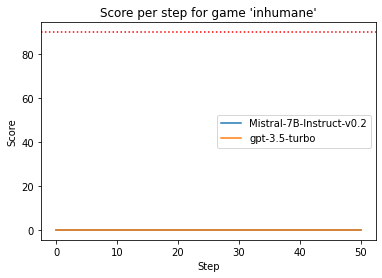

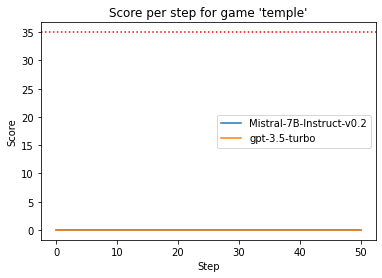

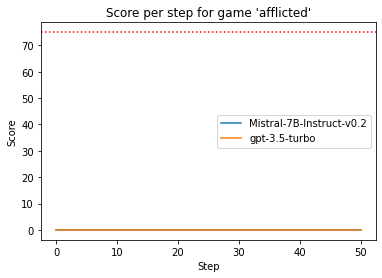

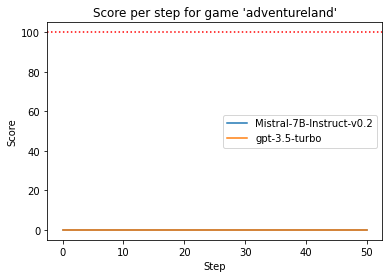

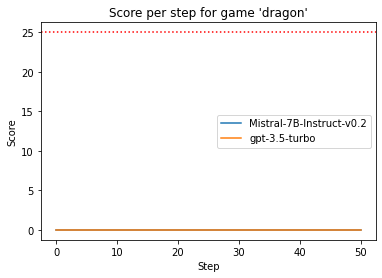

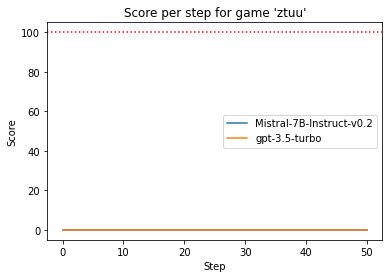

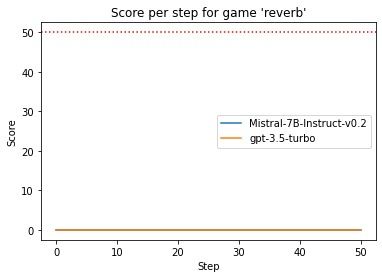

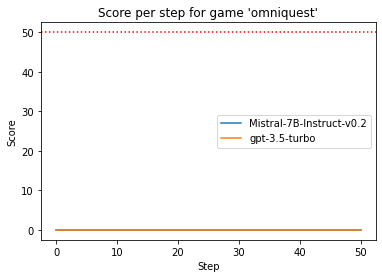

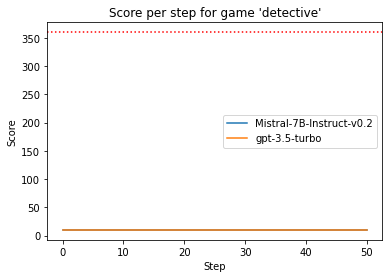

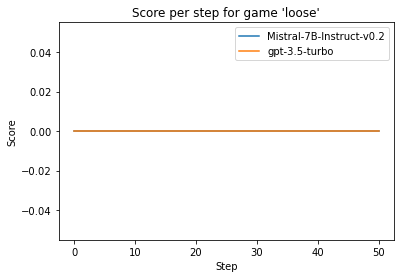

In [213]:
bsw_mistral_dir = '/Users/mirandamelodies99/code/if-agents/experiments/bsw-mistral-BUGFIX_20240303_162259'
bsw_gpt_35_dir ='/Users/mirandamelodies99/code/if-agents/experiments/bsw-gpt3.5-BUGFIX_20240303_161809'

for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    score_per_step(
    [
        f'{bsw_mistral_dir}/{game_file}',
        f'{bsw_gpt_35_dir}/{game_file}',
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo'],
    game
    )

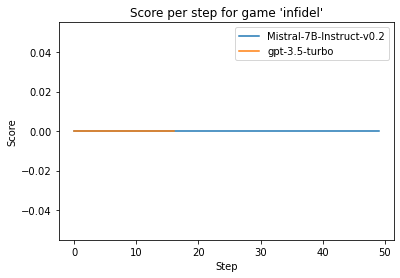

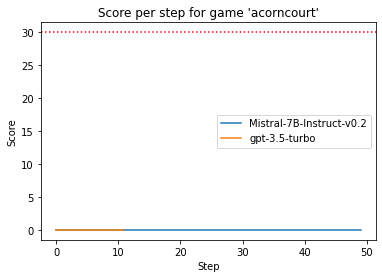

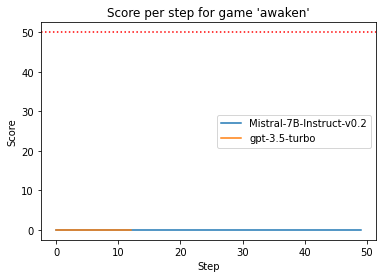

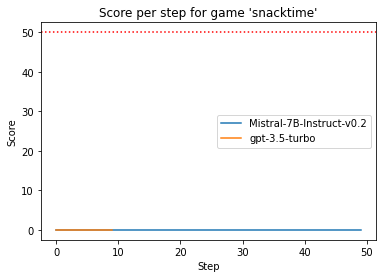

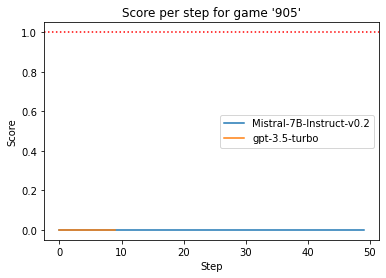

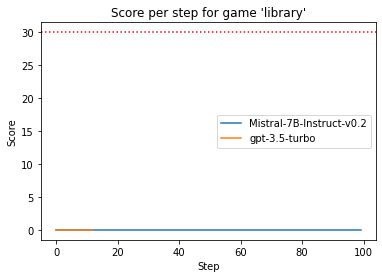

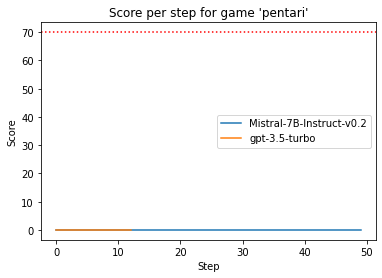

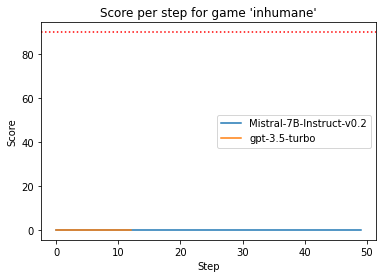

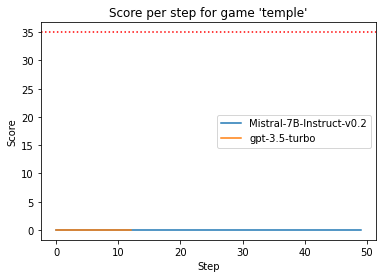

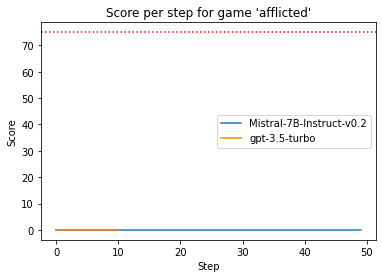

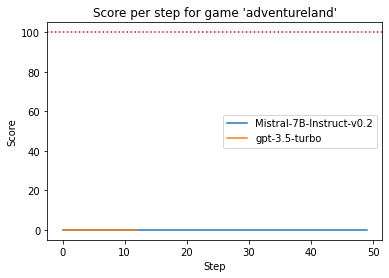

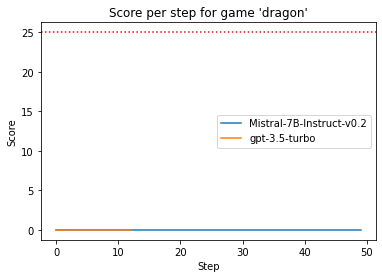

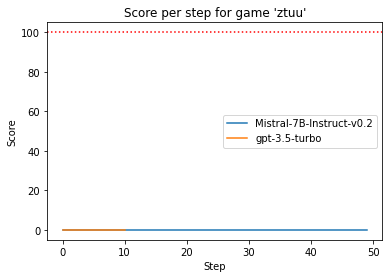

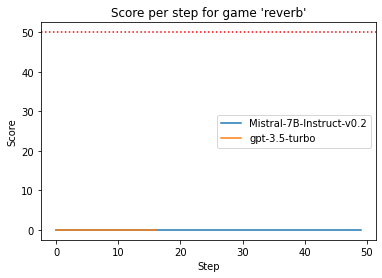

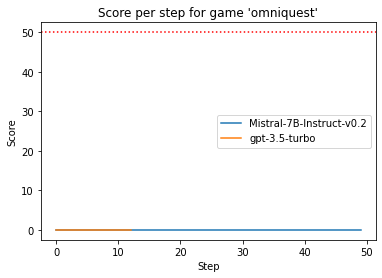

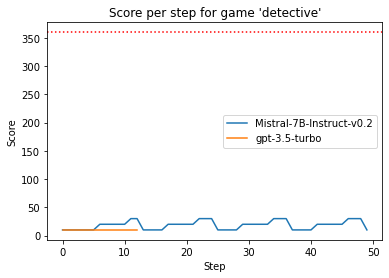

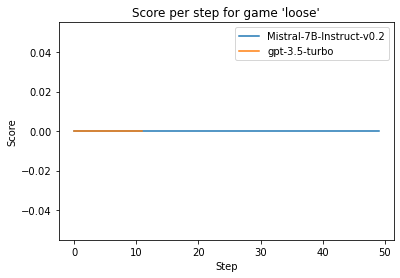

In [214]:
react_mistral_dir='/Users/mirandamelodies99/code/if-agents/experiments/react_possiblegames_mistralai_Mistral-7B-Instruct-v0.2_20240303_145828'
react_gpt_35_dir='/Users/mirandamelodies99/code/if-agents/experiments/react_possiblegames_debug_gpt-3.5-turbo_20240303_143023'

for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    score_per_step(
    [
        f'{react_mistral_dir}/{game_file}',
        f'{react_gpt_35_dir}/{game_file}',
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo'],
    game
    )

# moves per step

In [215]:
def moves_per_step(json_paths, labels, game_name):
    data_lsts = [json.load(open(json_path, 'r')) for json_path in json_paths]
    dfs = [pd.DataFrame(data) for data in data_lsts]
    # Create a new figure
    plt.figure()
    
    for lab, df in zip(labels, dfs):
        plt.plot(df.index, df['moves'], label=lab)

    # Set the title and labels
    plt.title(f"Moves per step for game '{game_name}'")
    plt.xlabel('Step')
    plt.ylabel('Moves')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()

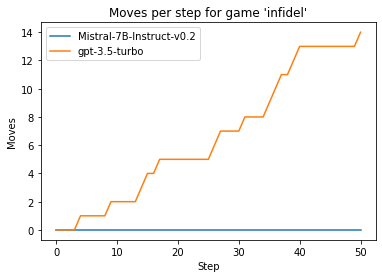

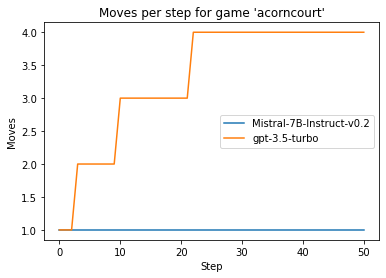

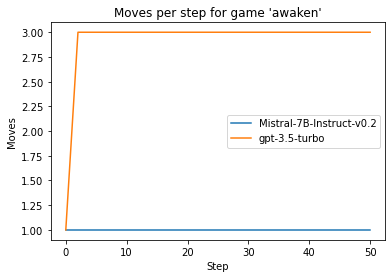

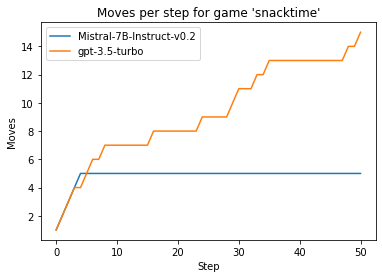

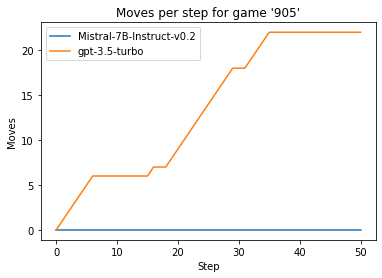

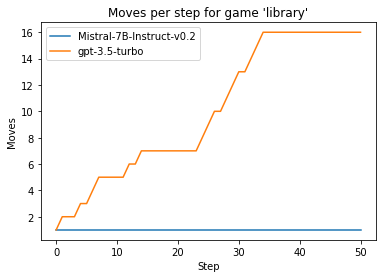

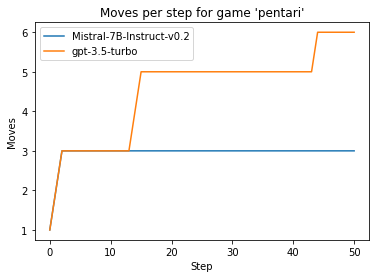

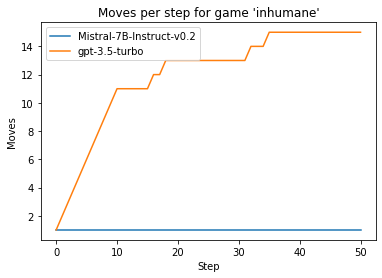

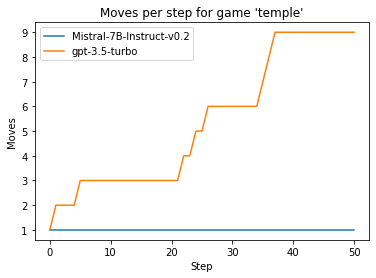

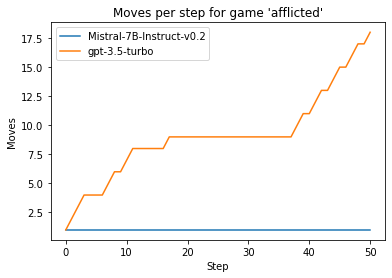

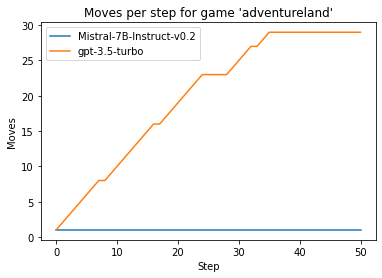

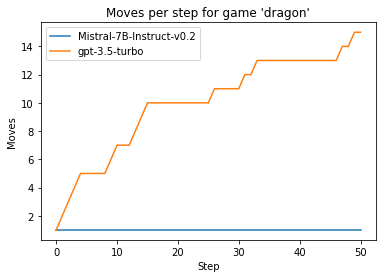

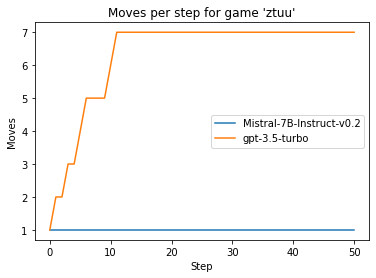

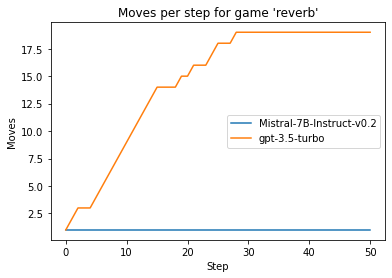

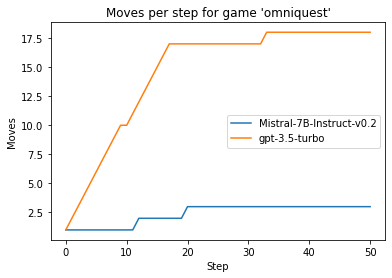

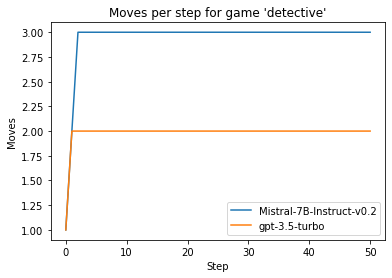

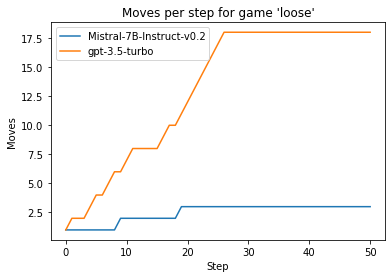

In [216]:
bsw_mistral_dir = '/Users/mirandamelodies99/code/if-agents/experiments/bsw-mistral-BUGFIX_20240303_162259'
bsw_gpt_35_dir ='/Users/mirandamelodies99/code/if-agents/experiments/bsw-gpt3.5-BUGFIX_20240303_161809'

for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    moves_per_step(
    [
        f'{bsw_mistral_dir}/{game_file}',
        f'{bsw_gpt_35_dir}/{game_file}',
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo'],
    game
    )

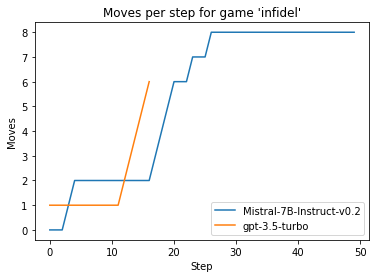

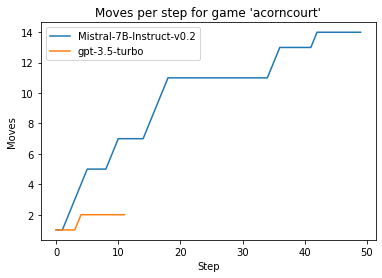

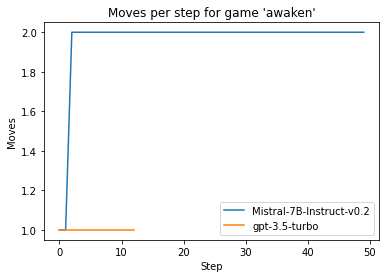

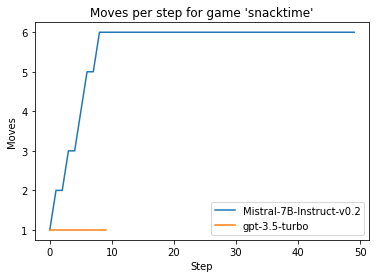

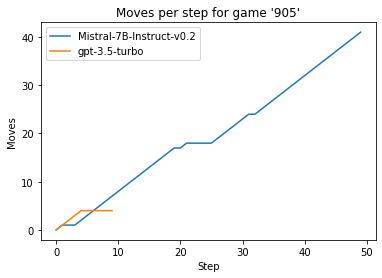

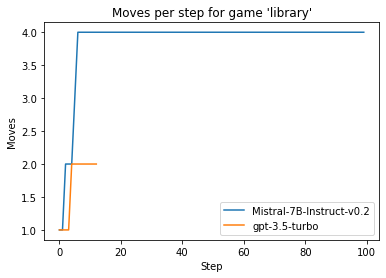

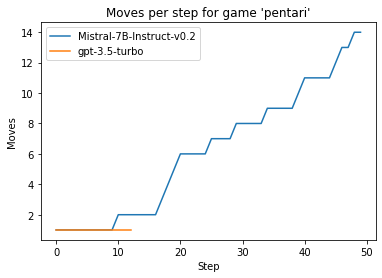

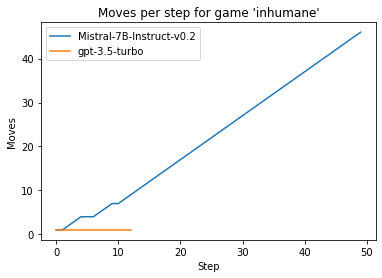

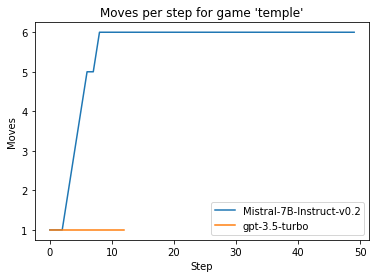

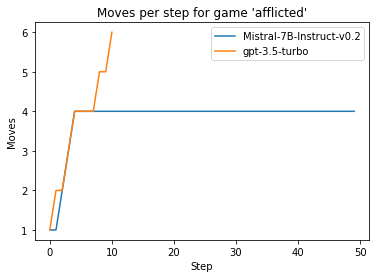

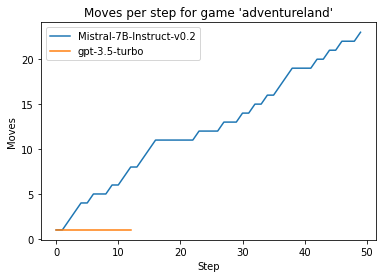

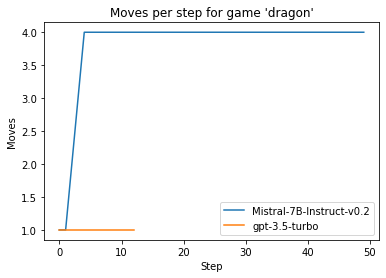

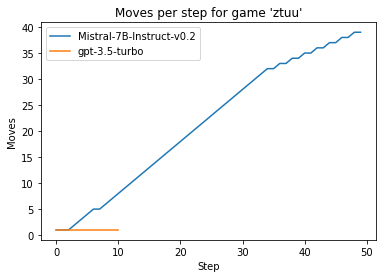

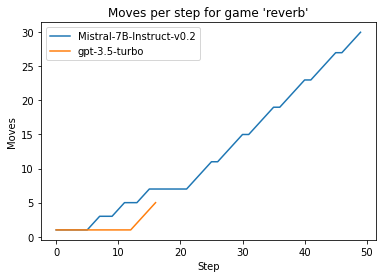

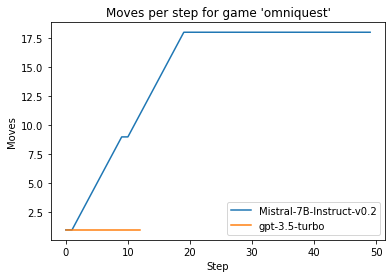

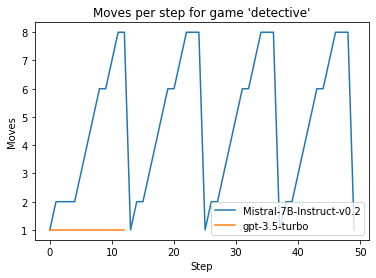

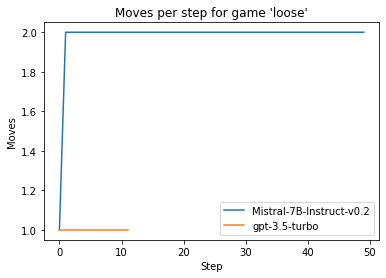

In [217]:
react_mistral_dir='/Users/mirandamelodies99/code/if-agents/experiments/react_possiblegames_mistralai_Mistral-7B-Instruct-v0.2_20240303_145828'
react_gpt_35_dir='/Users/mirandamelodies99/code/if-agents/experiments/react_possiblegames_debug_gpt-3.5-turbo_20240303_143023'

for game, game_file in zip(game_names, all_game_files):
    if game=='moonlit': continue # for some reason gpt 4 didn't properly log moonlit
    moves_per_step(
    [
        f'{react_mistral_dir}/{game_file}',
        f'{react_gpt_35_dir}/{game_file}',
    ], 
    ['Mistral-7B-Instruct-v0.2','gpt-3.5-turbo'],
    game
    )

# average score per agent

In [ ]:
# bar chart, bar for each agent
# y axis is score / max score averaged across all games

In [168]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

table_2_df = pd.read_csv('../if_agents/jericho-metadata/table_2_df.csv')

def get_max_score(game_name):
    try:
        max_score = int(table_2_df[table_2_df['game'] == game_name]['max_score'])
    except:
        max_score = 'unknown'
    return max_score

def get_scores(experiment):  
    scores = []
    
    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'score' in data[-1]:
                    score = data[-1]['score']
                if 'info' in data[-1]:
                    score = data[-1]['info']['score']
                max_score = get_max_score(file.split('.')[0])  
                if max_score == 'unknown': continue
                scores.append(score / max_score)
    if len(scores) > 0:
        return np.mean(scores)
    else:
        return None
    
def generate_graph(experiments, agent_names, llm_names):
    drrn_score = 0.164
    n_agents = len(agent_names)
    n_llms = len(llm_names)

    # Prepare results matrix based on scores
    results = np.zeros((n_agents, n_llms))
    for agent_idx, agent in enumerate(agent_names):
        for llm_idx, llm in enumerate(llm_names):
            results[agent_idx, llm_idx] = get_scores(experiments[agent_idx][llm_idx])

    barWidth = 0.1
    r = np.arange(n_agents + 1)  # Add an additional slot for DRRN

    plt.figure(figsize=(10,7))
    
    # Create bars for each llm
    for i in range(n_llms):
        plt.bar(r[:n_agents] + i*barWidth, results[:, i], width=barWidth, edgecolor='grey', label=llm_names[i])

    # Add DRRN score as a separate group, with its own color
    plt.bar(r[-1] + barWidth, drrn_score, width=barWidth, color='red', label='DRRN')

    plt.xlabel('Agents', fontweight='bold')
    plt.ylabel('Avg. (Score / Max Score) on "possible" games', fontweight='bold')
    plt.xticks(np.arange(len(agent_names)+1)+n_llms/20, agent_names + ['DRRN'])  # Add DRRN to labels

    # Create legend & Show graphic
    plt.legend()
    plt.show()

In [245]:
def get_scores_mean_std(experiment):
    scores = []

    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'score' in data[-1]:
                    score = data[-1]['score']
                if 'info' in data[-1]:
                    score = data[-1]['info']['score']
                max_score = get_max_score(file.split('.')[0])  
                if max_score == 'unknown': continue
                scores.append(score / max_score)
    if len(scores) > 0:
        mean = np.mean(scores)
        std = np.std(scores) / np.sqrt(len(scores))  # 95% confidence intervals
        return mean, std
    else:
        return None, None
    
def generate_graph_with_errors(experiments, agent_names, llm_names):
    drrn_score = 0.164
    n_agents = len(agent_names)
    n_llms = len(llm_names)

    means = np.zeros((n_agents, n_llms))
    errors = np.zeros((n_agents, n_llms))

    for agent_idx, agent in enumerate(agent_names):
        for llm_idx, llm in enumerate(llm_names):
            means[agent_idx, llm_idx], errors[agent_idx, llm_idx] = get_scores_mean_std(experiments[agent_idx][llm_idx])

    r = np.arange(n_agents + 1)  # Add an additional slot for DRRN
    barWidth = 0.1

    plt.figure(figsize=(10,7))

    for i in range(n_llms):
        plt.errorbar(r[:n_agents] + i*barWidth, means[:, i], yerr=errors[:, i], fmt='o', label=llm_names[i])

    # Add DRRN score as a separate dot
    plt.errorbar(r[-1] + barWidth, drrn_score, yerr=0, fmt='o', color='red', label='DRRN')

    plt.xlabel('Agents', fontweight='bold')
    plt.ylabel('Avg. (Score / Max Score) on "possible" games', fontweight='bold')
    plt.xticks(np.arange(len(agent_names)+1)+n_llms/20, agent_names + ['DRRN'])  # Add DRRN to labels

    plt.legend()
    plt.show()


In [223]:
reflex_mistral = '/Users/mirandamelodies99/code/if-agents/experiments/reflexion_possiblegames_mistralai_Mistral-7B-Instruct-v0.2_20240304_150313'
reflex_gpt_35 = '/Users/mirandamelodies99/code/if-agents/experiments/reflexion_possiblegames_gpt-3.5-turbo_20240304_155512'

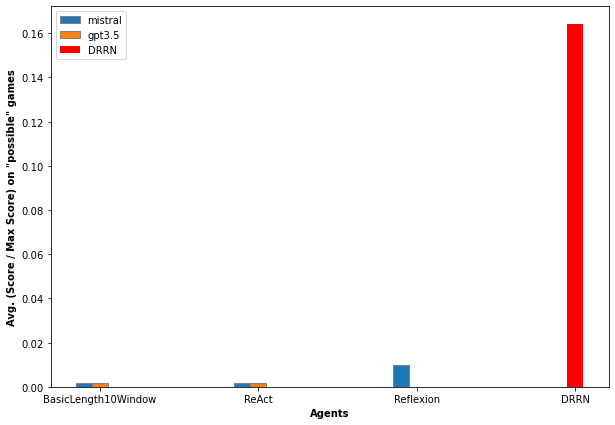

In [246]:
generate_graph(
    [[bsw_mistral_dir,bsw_gpt_35_dir],[react_mistral_dir,react_gpt_35_dir],[reflex_mistral,reflex_gpt_35]],
    ['BasicLength10Window', 'ReAct', 'Reflexion'],
    ['mistral', 'gpt3.5'] # replace these with different agents
)

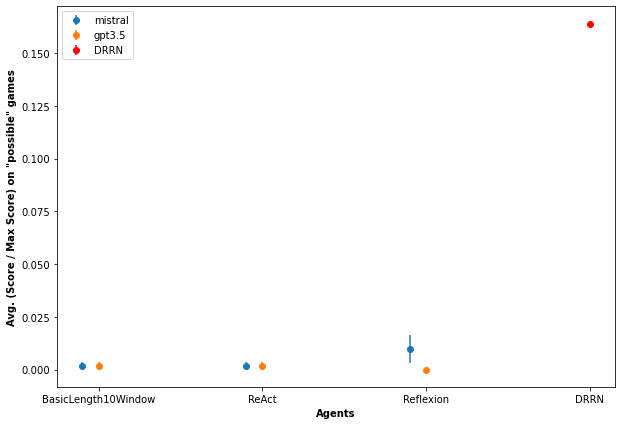

In [247]:
generate_graph_with_errors(
    [[bsw_mistral_dir,bsw_gpt_35_dir],[react_mistral_dir,react_gpt_35_dir],[reflex_mistral,reflex_gpt_35]],
    ['BasicLength10Window', 'ReAct', 'Reflexion'],
    ['mistral', 'gpt3.5'] # replace these with different agents
)

# average moves / agent

In [211]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

table_2_df = pd.read_csv('../if_agents/jericho-metadata/table_2_df.csv')

def get_moves(experiment):  
    scores = []
    
    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'score' in data[-1]:
                    score = data[-1]['moves']
                if 'info' in data[-1]:
                    score = data[-1]['info']['moves']
                scores.append(score)
    if len(scores) > 0:
        return np.mean(scores)
    else:
        return None
    
def generate_moves_graph(experiments, agent_names, llm_names):
    n_agents = len(agent_names)
    n_llms = len(llm_names)

    # Prepare results matrix based on scores
    results = np.zeros((n_agents, n_llms))
    for agent_idx, agent in enumerate(agent_names):
        for llm_idx, llm in enumerate(llm_names):
            results[agent_idx, llm_idx] = get_moves(experiments[agent_idx][llm_idx])

    barWidth = 0.1
    r = np.arange(n_agents + 1)  # Add an additional slot for DRRN

    plt.figure(figsize=(10,7))
    
    # Create bars for each llm
    for i in range(n_llms):
        plt.bar(r[:n_agents] + i*barWidth, results[:, i], width=barWidth, edgecolor='grey', label=llm_names[i])


    plt.xlabel('Agents', fontweight='bold')
    plt.ylabel('Avg. number of moves on "possible" games', fontweight='bold')
    plt.xticks(np.arange(len(agent_names))+n_llms/20, agent_names)  # Add DRRN to labels

    # Create legend & Show graphic
    plt.legend()
    plt.show()

In [251]:
def get_moves_mean_std(experiment):
    scores = []

    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'score' in data[-1]:
                    score = data[-1]['moves']
                if 'info' in data[-1]:
                    score = data[-1]['info']['moves']
                scores.append(score)
    if len(scores) > 0:
        mean = np.mean(scores)
        std = np.std(scores) / np.sqrt(len(scores))  # 95% confidence intervals
        return mean, std
    else:
        return None, None

def generate_moves_graph_with_errors(experiments, agent_names, llm_names):
    n_agents = len(agent_names)
    n_llms = len(llm_names)

    means = np.zeros((n_agents, n_llms))
    errors = np.zeros((n_agents, n_llms))

    for agent_idx, agent in enumerate(agent_names):
        for llm_idx, llm in enumerate(llm_names):
            means[agent_idx, llm_idx], errors[agent_idx, llm_idx] = get_moves_mean_std(experiments[agent_idx][llm_idx])

    r = np.arange(n_agents + 1)  # Add an additional slot for DRRN
    barWidth = 0.1

    plt.figure(figsize=(10,7))

    for i in range(n_llms):
        plt.errorbar(r[:n_agents] + i*barWidth, means[:, i], yerr=errors[:, i], fmt='o', label=llm_names[i])

    plt.xlabel('Agents', fontweight='bold')
    plt.ylabel('Avg. number of moves on "possible" games', fontweight='bold')
    plt.xticks(np.arange(len(agent_names))+n_llms/20, agent_names)  # Add DRRN to labels

    plt.legend(loc='upper left')
    plt.show()

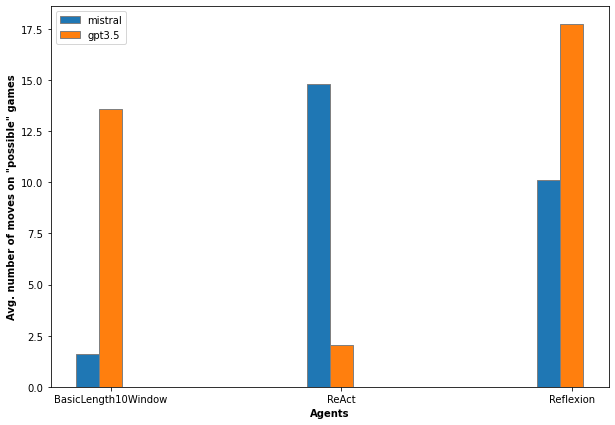

In [225]:
generate_moves_graph(
    [[bsw_mistral_dir,bsw_gpt_35_dir],[react_mistral_dir,react_gpt_35_dir],[reflex_mistral,reflex_gpt_35]],
    ['BasicLength10Window', 'ReAct', 'Reflexion'],
    ['mistral', 'gpt3.5'] # replace these with different agents
)

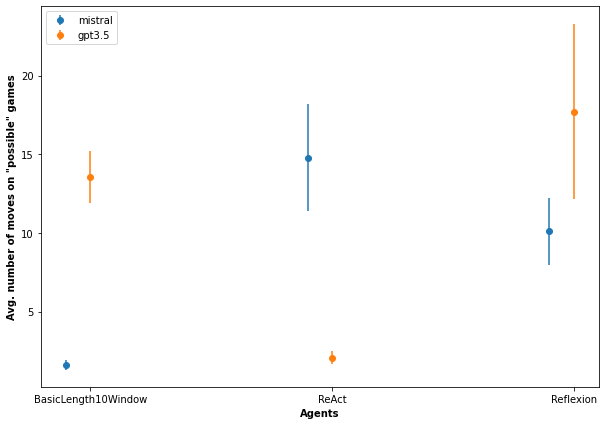

In [252]:
generate_moves_graph_with_errors(
    [[bsw_mistral_dir,bsw_gpt_35_dir],[react_mistral_dir,react_gpt_35_dir],[reflex_mistral,reflex_gpt_35]],
    ['BasicLength10Window', 'ReAct', 'Reflexion'],
    ['mistral', 'gpt3.5'] # replace these with different agents
)

## action space prompt engineering + shortening guidelines
**action space prompt engineering (ASPE)** refers to how we changed "always either {tool_list} or, when done, Finish\[answer\]" -> "always either one of the valid actions provided in the observation or, when done, Finish\[answer\]" and "observations based on action" -> "observations based on previous action and a list of valid actions for the next action" so that LM prompt in each turn starts with:
```
... {preamble}
---

Follow the following format.

Input: An instruction to play the game.

Thought 1: next steps to take based on last observation

Action 1: always either one of the valid actions provided in the observation or, when done, Finish[answer]

Observation 1: observations based on previous action and a list of valid actions for the next action

Thought 2: next steps to take based on last observation

Action 2: always either one of the valid actions provided in the observation or, when done, Finish[answer]

Observation 2: observations based on previous action and a list of valid actions for the next action

... {repeat format for Thought j, Action j, Observation j, for each iteration j up to max_steps or until victory}
---
... {playback}
```

**short guidelines (SG)** refers to how we changed the guidelines section so that the instructions for each thought, action, observation cycle are not repeated with each move, so that the LM prompt in each turn starts with:
```
... {preamble}
---

Follow the following format.

Input: An instruction to play the game.

Thought: next steps to take based on last observation

Action: always either one of the valid actions provided in the observation or, when done, Finish[answer]

Observation: observations based on previous action and a list of valid actions for the next action
---
... {playback}
```

In [232]:
react_actionspace_mistral_dir = "/Users/mirandamelodies99/code/if-agents/experiments/react-actionspace_mistralai_Mistral-7B-Instruct-v0.2_20240310_221619"
react_actionspace_gpt_dir = '/Users/mirandamelodies99/code/if-agents/experiments/react-actionspace_gpt-3.5-turbo_20240310_220729'

In [235]:
# note these both also have action space prompt engineering
react_shorterprompt_gpt_dir = "/Users/mirandamelodies99/code/if-agents/experiments/shorterprompt-react_gpt-3.5-turbo_20240311_004547"
react_shorterprompt_mistral_dir = "/Users/mirandamelodies99/code/if-agents/experiments/shorterprompt-react_mistralai_Mistral-7B-Instruct-v0.2_20240310_235637"

In [257]:
react_shorterprompt_noaction_gpt = '/Users/mirandamelodies99/code/if-agents/experiments/shorterprompt-noactionspace-react_gpt-3.5-turbo_20240311_101537'
react_shorterprompt_noaction_mistral = '/Users/mirandamelodies99/code/if-agents/experiments/shorterprompt-noactionspace-react_mistralai_Mistral-7B-Instruct-v0.2_20240311_092403'

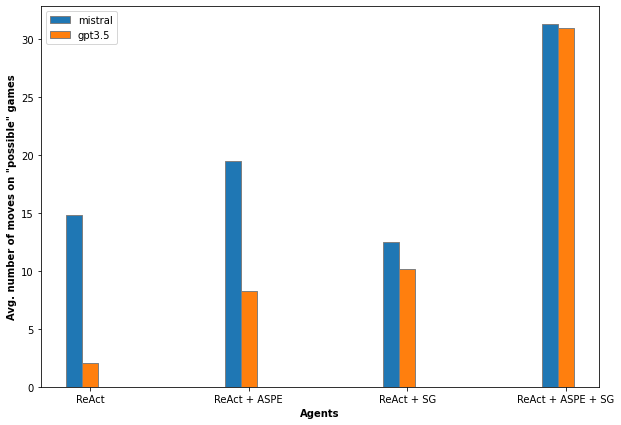

In [260]:
generate_moves_graph(
    [
        [react_mistral_dir, react_gpt_35_dir], 
        [react_actionspace_mistral_dir, react_actionspace_gpt_dir], 
        [react_shorterprompt_noaction_mistral, react_shorterprompt_noaction_gpt],
        [react_shorterprompt_mistral_dir, react_shorterprompt_gpt_dir]
    ],
    [
        'ReAct', 
        'ReAct + ASPE', 
        'ReAct + SG',
        'ReAct + ASPE + SG',

    ],
    ['mistral', 'gpt3.5']
)

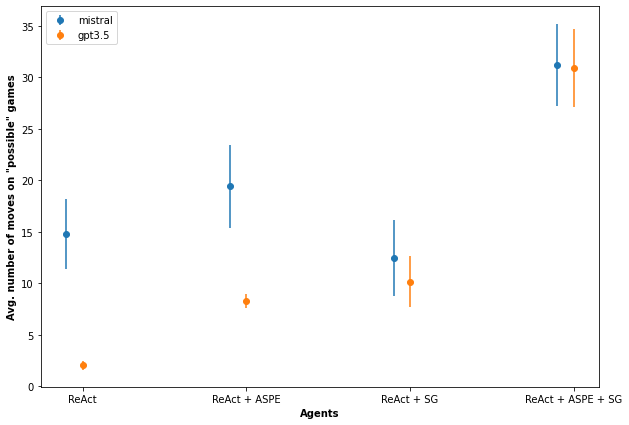

In [261]:
generate_moves_graph_with_errors(
    [
        [react_mistral_dir, react_gpt_35_dir], 
        [react_actionspace_mistral_dir, react_actionspace_gpt_dir], 
        [react_shorterprompt_noaction_mistral, react_shorterprompt_noaction_gpt],
        [react_shorterprompt_mistral_dir, react_shorterprompt_gpt_dir]
    ],
    [
        'ReAct', 
        'ReAct + ASPE', 
        'ReAct + SG',
        'ReAct + ASPE + SG',

    ],
    ['mistral', 'gpt3.5']
)

# sorted number of moves

In [271]:
def make_moves_map(experiment):  
    moves_map = {}
    
    for file in os.listdir(experiment):
        if file.endswith('.json'):
            game = os.path.join(experiment, file)
            with open(game) as f:
                data = json.load(f)
                if 'moves' in data[-1]:
                    score = data[-1]['moves']
                if 'info' in data[-1]:
                    score = data[-1]['info']['moves']
                moves_map[file] = score
    return dict(sorted(moves_map.items(), key=lambda item: item[1], reverse=True))

In [272]:
make_moves_map(react_shorterprompt_mistral_dir)

{'moonlit.z5.json': 50,
 'omniquest.z5.json': 50,
 'temple.z5.json': 49,
 'dragon.z5.json': 49,
 'reverb.z5.json': 49,
 'awaken.z5.json': 47,
 'adventureland.z5.json': 46,
 'infidel.z3.json': 43,
 'acorncourt.z5.json': 30,
 'snacktime.z8.json': 23,
 'pentari.z5.json': 19,
 'loose.z5.json': 18,
 'library.z5.json': 15,
 'afflicted.z8.json': 13,
 '905.z5.json': 12,
 'inhumane.z5.json': 10,
 'detective.z5.json': 8}